<a href="https://colab.research.google.com/github/andrerubeis/My-Projects/blob/main/Academic%20Projects/Network%20Dynamics/Labs/Lab05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear averaging dynamics
In the first part of the lab we study linear averaging dynamics on graphs.

Let $G=(V,E,W)$ be a weighted graph, and $x(t) \in \mathrm{R}^{V}$ denote the state of the nodes of the graph.

The dynamics of $x(t)$ reads

$$
x(t+1) = Px(t),
$$

where $P$ is the normalized adjacency matrix.
Among the applications, the most popular is opinion dynamics, where $x_i$ indicates the opinion of node $i$. This dynamics is known as French - De Groot.

Note that we assume by convention that the opinion of node $i$ is influenced by the opinion of node $j$ if $P_{ij}>0$, i.e., the link $(i,j)$ is to be interpreted as $i$ watching $j$ and updating her opinion based on opinion of $j$.

**Observation**: observe that $\mathbf{1}$ is an equilibrium distribution, since $\mathbf{1} = P \mathbf{1}$ ($P$ is row-stochastic by construction), i.e., consensus distributions are equilibria of the dynamics.

**Question**: what are the conditions under which the dynamics converges to consensus?

**Theorem**: assume that
- its condensation graph has 1 sink;
- the sink component of the graph is aperiodic;

Then,

$$
\lim_{t \to +\infty} x(t) = \alpha \mathbf{1},
$$

i.e., the agents get to consensus.

## Why aperiodicity matters: example

Number of nodes: 4


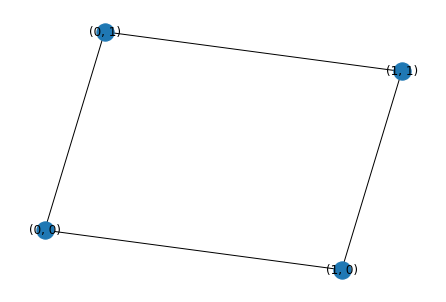

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

G = nx.generators.lattice.grid_graph(dim=[2,2])
n_nodes = len(G)
print("Number of nodes:", n_nodes)

# labels of nodes are couples: (column,row)
pos = nx.spring_layout(G) 
nx.draw(G, pos, with_labels=True)

Note that the graph is periodic because of every cycle has even length (the graph is bipartite and undirected, thus its period is 2)

In [2]:
# Construct P
W = nx.adjacency_matrix(G) # -> return type is scipy.sparse.csr_matrix
W = W.toarray() # convert A to a numpy array
degrees = np.sum(W,axis=1)
D = np.diag(degrees)
P = np.linalg.inv(D) @ W

In [3]:
# Construct a dictionary that maps the label of nodes  
# (from (0,0) to (2,1)) to their index (from 0 to n_nodes-1)
indices = dict()
for i in range(n_nodes):
    indices[list(G.nodes)[i]] = i
print(indices)

{(0, 0): 0, (0, 1): 1, (1, 0): 2, (1, 1): 3}


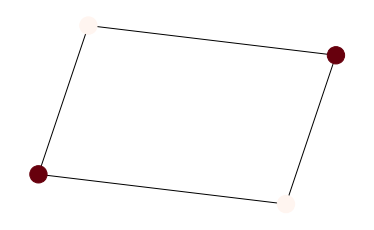

In [4]:
# Assign initial opinion to nodes and run the dynamics
x = np.array([1,0,0,1])

nodecolor=x*1000

# plot centrality at iteration 0
plt.figure(1, figsize=(5,3))
# we draw the graph with same node position "pos" defined above
nx.draw(G,pos,
         nodelist=list(G.nodes()), 
         # node's color reflects centrality values (higher dc = darker color)
         node_color=nodecolor,
         font_size=8,
         # node's colors are on the red scale
         cmap=plt.cm.Reds) 

Nodes with opinion 1 are red, nodes with opinion 0 are white.

After one iteration...

x(1): [0. 1. 1. 0.]


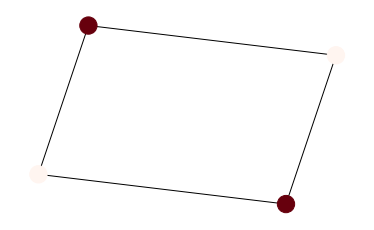

In [5]:
x = P @ x

nodecolor=x*1000

plt.figure(1, figsize=(5,3))
# we draw the graph with same node position "pos" defined above
nx.draw(G,pos,
         nodelist=list(G.nodes()), 
         # node's color reflects centrality values (higher dc = darker color)
         node_color=nodecolor,
         font_size=8,
         # node's colors are on the red scale
         cmap=plt.cm.Reds) 

print("x(1):", x)

What do you expect after 5 iterations from the initial condition?

x(5): [0. 1. 1. 0.]


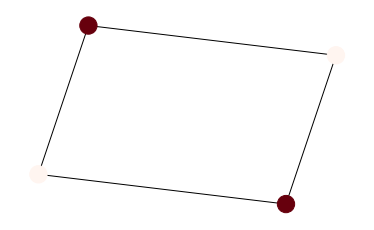

In [6]:
x = P @ P @ P @ P @ x

nodecolor=x*1000

plt.figure(1, figsize=(5,3))
# we draw the graph with same node position "pos" defined above
nx.draw(G,pos,
         nodelist=list(G.nodes()), 
         # node's color reflects centrality values (higher dc = darker color)
         node_color=nodecolor,
         font_size=8,
         # node's colors are on the red scale
         cmap=plt.cm.Reds) 

print("x(5):", x)

Periodicity of the graph does not allow a proper mixing of the opinions!

Let us add a link to make the graph aperiodic.

Number of nodes: 4


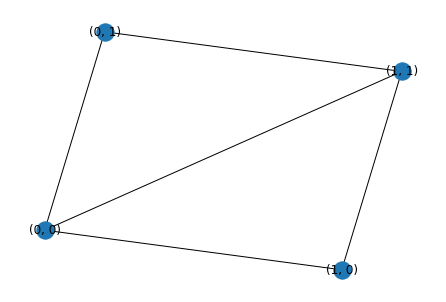

In [7]:
G = nx.generators.lattice.grid_graph(dim=[2,2])
G.add_edge((0,0),(1,1))
n_nodes = len(G)
print("Number of nodes:", n_nodes)

# Construct P
W = nx.adjacency_matrix(G) # -> return type is scipy.sparse.csr_matrix
W = W.toarray() # convert A to a numpy array
degrees = np.sum(W,axis=1)
D = np.diag(degrees)
P = np.linalg.inv(D) @ W

# labels of nodes are couples: (column,row)
nx.draw(G, pos, with_labels=True)

Let us run again the dynamics with same initial conditions as before.

In [8]:
x = np.array([1,0,0,1])

x = P @ x
print("x(1):", x)

x = P @ x
print("x(2):", x)

x = P @ x
print("x(3):", x)

x = P @ x
print("x(4):", x)

x = P @ x
print("x(5):", x)

x = P @ P @ P @ P @ P @ x
print("x(10):", x)

x = P @ P @ P @ P @ P @ x
print("x(15):", x)

x = P @ P @ P @ P @ P @ x
print("x(20):", x)

x = P @ P @ P @ P @ P @ x
print("x(25):", x)

x = P @ P @ P @ P @ P @ x
print("x(30):", x)

x(1): [0.33333333 1.         1.         0.33333333]
x(2): [0.77777778 0.33333333 0.33333333 0.77777778]
x(3): [0.48148148 0.77777778 0.77777778 0.48148148]
x(4): [0.67901235 0.48148148 0.48148148 0.67901235]
x(5): [0.5473251  0.67901235 0.67901235 0.5473251 ]
x(10): [0.60693661 0.58959508 0.58959508 0.60693661]
x(15): [0.59908654 0.60137019 0.60137019 0.59908654]
x(20): [0.60012029 0.59981956 0.59981956 0.60012029]
x(25): [0.59998416 0.60002376 0.60002376 0.59998416]
x(30): [0.60000209 0.59999687 0.59999687 0.60000209]


The dynamics goes to consensus.

### Two questions
- How fast the consensus is achieved?
- What is the opinion that every node will eventually reach?

We will answer to these questions later on.

## Why 1 sink in the condensation graph: example

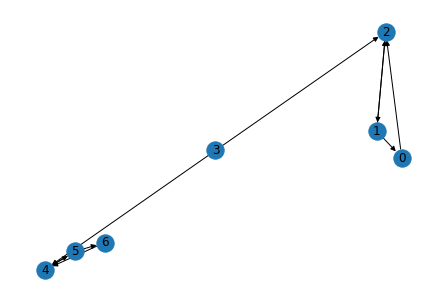

In [9]:
G = nx.DiGraph()
G.add_edges_from([(1,2),(2,1),(1,0),(0,2),(3,2),(3,4),(4,5),(5,4),(6,4),(5,6)])

# labels of nodes are couples: (column,row)
pos = nx.spring_layout(G) 
nx.draw(G, pos, with_labels=True)

How many sinks does this graph have?

Let us compute the condensation graph.

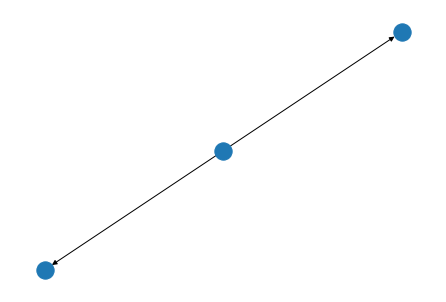

In [10]:
CG = nx.algorithms.components.condensation(G)

nx.draw(CG)

The graph has 2 sinks. Thus, the sufficient conditions under which the dynamics converges to consensus does not hold.

Let us figure out why by an example.

In [11]:
# Construct P
W = nx.adjacency_matrix(G) # -> return type is scipy.sparse.csr_matrix
W = W.toarray() # convert A to a numpy array
degrees = np.sum(W,axis=1)
D = np.diag(degrees)
P = np.linalg.inv(D) @ W

# define initial condition
x = [1, 1, 0, 1, 1, 0, 0]

for n in range(99):
    x = P @ x
print("x(100):", x)

x(100): [0.8 0.8 0.8 0.6 0.4 0.4 0.4]


The dynamics does not reach consensus.

**Question**: can you intuitively understand why?

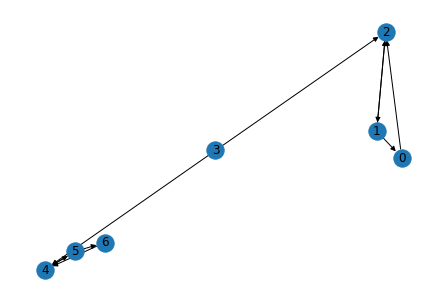

In [12]:
nx.draw(G, pos, with_labels=True)

Let us now add a link in such a way that the condensation graph has now a single sink.

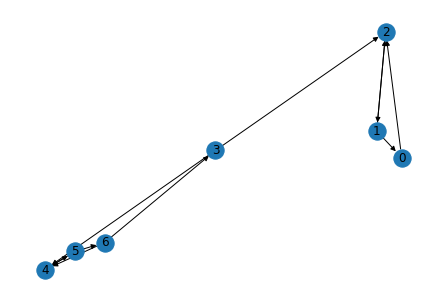

In [13]:
G.add_edge(6,3)
nx.draw(G, pos, with_labels=True)

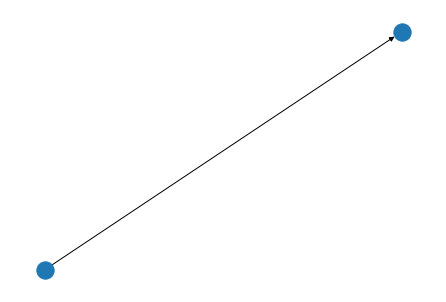

In [14]:
CG = nx.algorithms.components.condensation(G)
nx.draw(CG)

Let us now compute the dynamics.

In [15]:
# Construct P
W = nx.adjacency_matrix(G) # -> return type is scipy.sparse.csr_matrix
W = W.toarray() # convert A to a numpy array
degrees = np.sum(W,axis=1)
D = np.diag(degrees)
P = np.linalg.inv(D) @ W

# define initial condition
x = [1, 1, 0, 1, 1, 0, 0]

for n in range(99):
    x = P @ x
print("x(100):", x, "\n")

for n in range(199):
    x = P @ x
print("x(200):", x, "\n")

for n in range(999):
    x = P @ x
print("x(1000):", x)

x(100): [0.8        0.8        0.8        0.79879255 0.79770667 0.79782211
 0.79815683] 

x(200): [0.8        0.8        0.8        0.79999996 0.79999992 0.79999993
 0.79999994] 

x(1000): [0.8 0.8 0.8 0.8 0.8 0.8 0.8]


We now reach consensus!!

## Consensus value

How is the consensus value computed?

Let $\pi$ denote the normalized left dominant eigenvector of $P$, i.e., the normalized $\pi$ such that $P' \pi = \pi$ (which is unique because the graph has one sink only).
We use the fact that

$$
\pi' x(t) = \pi' P x(t-1) = \pi' x(t-1),
$$

thus $\pi' x(t)$ is constant along the dynamics. Thus,

$$
\pi' x(0) = \pi' \lim_{t \to + \infty} x(t) = \alpha \pi' \mathbf{1} = \alpha.
$$

Thie computation above says that the consensus value $\alpha$ is the weighted average of the initial conditions of the nodes, where the weights are given by the (unique) invariant distribution $\pi$.

Recall that $\pi$ solving $\pi = P' \pi$ is also the invariant distribution centrality, thus the more a node is central the more its initial opinion affects the consensus value.

Let us explore the form of $\pi$ for this example.

pi 0 = [ 0.4  0.4  0.2 -0.  -0.  -0.  -0. ]


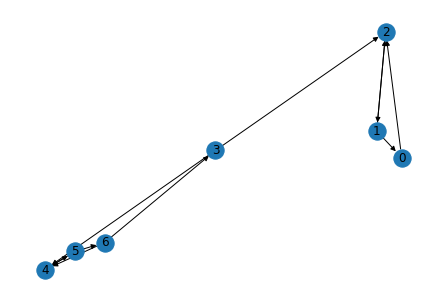

In [16]:
w,v = np.linalg.eig(P.T)

# selects the eigenvalue 1 and print the eigenvector
for index in [i for i in range(len(G)) if np.isclose(w[i],1)]: 
    pi = v[:,index].real  # -> eigenvectors are complex but pi is real, so we convert it to real
    pi = pi/np.sum(pi)
    print("pi", index, "=", pi)
    
nx.draw(G,pos,with_labels=True)

The invariant distribution centrality is 0 for all the nodes that do not belong to the sink of the condensantion graph!

This implies that the initial opinion of the nodes not belonging to the sink are negligible for the consensus value.

The intuition for this is that the nodes 0, 1 and 2 do not care of the other nodes, because are not outconnected to any other node out of the component, and they reach consensus because the induced subgraph on 0,1,2 is aperiodic and strongly connected.
Thus, their evolution is not affected by other nodes. Conversely, the other nodes update their opinion based on 2 also, thus eventually they tend to agree to the opinion of node 2 (and thus 0 and 1 as well).

Let us modify the initial condition of nodes 3,4,5,6 to observe that the consensus value is not affected by this modification.

In [17]:
# define initial condition
x = [1, 1, 0, 80, 25, 8, 12]

for n in range(99):
    x = P @ x
print("x(100):", x, "\n")

for n in range(200):
    x = P @ x
print("x(300):", x, "\n")

for n in range(1000):
    x = P @ x
print("x(1300):", x)

x(100): [0.8        0.8        0.8        0.87450582 0.94151047 0.93438691
 0.91373342] 

x(300): [0.8        0.8        0.8        0.80000243 0.80000462 0.80000439
 0.80000371] 

x(1300): [0.8 0.8 0.8 0.8 0.8 0.8 0.8]


## Speed of convergence

Let us work now for undirected (the following argument holds only for undirected) connected graphs. If the graph is also aperiodic, the dynamics is guaranteed to converge to consensus.

Let $\lambda:=\max \{\lambda_2,|\lambda_n|\}$, where $\lambda_1 \ge \lambda_2 \ge \cdots \ge \lambda_n$ are the eigenvalues of $P$. $\lambda_n \ge -1$. 

You'll see in the next theoretical lectures that the dynamics reaches consensus exponentially fast. In particular, the distance from consensus at time $t$ is in some sense proportional to $\lambda^t$ (this will be shown more formally in the theoretical lectures).

Thus, if $\lambda$ is close to $1$, then the convergence is slow, whereas if $\lambda$ is small the convergence is faster.

Note also that for periodic graphs, by Perron-Frobenius theorem have $\lambda_n = -1$ (thus $\lambda=1$), then the convergence to consensus is not achieved. This is coherent with the theory of consensus.

**Remark**: note that every periodic strongly connected graph can be made periodic by adding at least a selfloop in the graph. Indeed, if a selfloop $(i,i)$ is added, then the period of node $i$ is 1. Since all the nodes in the same connected component have same period, then all the nodes have period $1$ and the graph is aperiodic.

To avoid periodic graphs, sometimes it is useful to introduce the **lazy dynamics** obtained by replacing $P$ with 

$$
\frac{P+\mathbf{I}}{2}
$$

This is equivalent to adding selfloops to each node in the graph with weight equivalent to the degree of the node itself.

An interpretation for the lazy dynamics is that nodes have some inertia in the opinion. Instead of averaging over the opinions of the neighbors, they also take into account their opinion at the previous step. In fact,

$$
x_i(t+1) = \frac{x_i(t+1) + \sum_{j} P_{ij} x_j(t)}{2}.
$$

Let us go back to the initial periodic example, and show that the lazy dynamics converges.

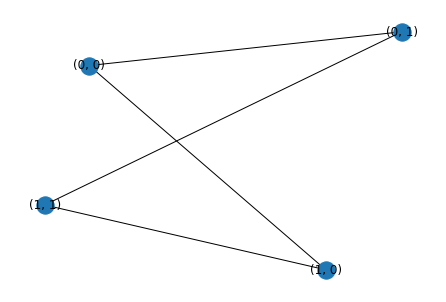

In [18]:
G = nx.generators.lattice.grid_graph(dim=[2,2])

# labels of nodes are couples: (column,row)
pos = nx.spring_layout(G) 
nx.draw(G, pos, with_labels=True)

# Construct P
W = nx.adjacency_matrix(G) # -> return type is scipy.sparse.csr_matrix
W = W.toarray() # convert A to a numpy array
degrees = np.sum(W,axis=1)
D = np.diag(degrees)
P = np.linalg.inv(D) @ W

In [19]:
P = P/2 + np.diag(np.ones(4))/2

x = np.array([1, 0, 0, 1])

for n in range(9):
    x = P @ x
print("x(10):", x)

x(10): [0.5 0.5 0.5 0.5]


### How fast is the convergence of lazy dynamics?

Note that $\lambda_n(P_{lazy}) = 1/2 + \lambda_n(P)/2 \ge 1/2 + (-1/2) = 0$.

Thus, $\lambda = \lambda_2$. 

In the lazy dynamics, the speed convergence is governed by $\lambda_2$. Let us now define the relaxation time as

$$
\tau_{rel} = \frac{1}{1-\lambda_2}
$$

You will see in the next theoretical lectures that for undirected graphs $\lambda_2$ may be related to the level of connectedness of the graph. In particular, if the graph is well connected, $\lambda_2$ is smaller and the convergence to consensus is faster.

We do not investigate the details on how to define "connectedness" of graphs in proper way here. However, we can verify by a simple example how connectedness of the graph influences the speed of convergence.

Let us consider a **cycle graph** with 1000 nodes.

For the cycle graph one can show that

$$
\lambda_2(P) = \cos \frac{2\pi (n-1)}{n}.
$$

Thus,

$$
\lim_{n \to + \infty} \lambda(P_{lazy}) = \frac{1}{2} + \lim_{n \to + \infty} \frac{1}{2} \cos \frac{2\pi}{n} = 1-\frac{\pi}{n},
$$

and the relaxation time for the cycle is

$$
\tau_{rel} = \frac{n}{\pi}.
$$

This means that the convergence is achieved exponentially with a rate that scales linearly with $n$.

In [20]:
G = nx.cycle_graph(1000)

# Construct P
W = nx.adjacency_matrix(G) # -> return type is scipy.sparse.csr_matrix
W = W.toarray() # convert A to a numpy array
degrees = np.sum(W,axis=1)
D = np.diag(degrees)
P = np.linalg.inv(D) @ W

# Construct lazy P
P = P = P/2 + np.diag(np.ones(1000))/2

# let us start with random initial conditions
x = np.random.rand(1000)

variance = np.var(x)
t=0

while (variance>0.001):
    x = P @ x
    t=t+1
    variance = np.var(x)

print('Number of iteration for convergence:', t)

Number of iteration for convergence: 760


Let us consider the complete graph, which is the most connected graph by definition. For the complete graph,

$$
W=\mathbf{1}\mathbf{1}'-I.
$$

Since $\mathbf{1}\mathbf{1}'$ has equal columns, it has rank $1$. Thus $\mathbf{1}\mathbf{1}'$ has $n-1$ eigenvalues equal to $0$. The remaining eigenvalue can be found by using the fact that the sum of the eigenvalues is the trace of the matrix. Since $=\mathbf{1}\mathbf{1}'-I$, the spectrum of $W$ is

$$
\sigma_W = \{n-1,-1,\cdots,-1\}
$$

Since the complete graph is regular and every node has graph 1, $P=W/(n-1)$
Thus, the spectrum of $P$ is

$$
\sigma_P = \{1,-\frac{1}{n-1},\cdots,-\frac{1}{n-1}\},
$$

and $P_{lazy}$ has spectrum

$$
\sigma_{P_{lazy}} = \{1,-\frac{1}{2(n-1)}+\frac{1}{2},\cdots,-\frac{1}{2(n-1)}+\frac{1}{2}\}
$$

This implies that $\lambda_2 = \frac{n}{2(n-1)}$ and the relaxation time for large $n$ in the complete graph tends

$$
\lim_{n \to +\infty} \tau_{rel} = 1/2,
$$

i.e., even for infinite $n$ the relaxation time is finite.

In [21]:
G = nx.complete_graph(1000)

# Construct P
W = nx.adjacency_matrix(G) # -> return type is scipy.sparse.csr_matrix
W = W.toarray() # convert A to a numpy array
degrees = np.sum(W,axis=1)
D = np.diag(degrees)
P = np.linalg.inv(D) @ W

# Construct lazy P
P = P = P/2 + np.diag(np.ones(1000))/2

# let us start with random initial conditions
x = np.random.rand(1000)

variance = np.var(x)
n=0

while (variance>0.001):
    x = P @ x
    n=n+1
    variance = np.var(x)

print('Number of iteration for convergence:', n)

Number of iteration for convergence: 4


## Wisdom of crowds
Consider a graph, and assume that state of each node represents a noisy estimate of the real state $\mu$, i.e.,

$$
x_i = \mu + y_i,
$$

with $E[y_i]=0$, and the variance $\sigma^2 (y_i) = \sigma^2$ for each $i$.

Assume that the nodes of the graph talk each other, and assume that the graph is connected and aperiodic.
Eventually, they will reach to consensus, i.e., $\lim_{t \to +\infty} x(t) = \alpha \mathbf{1}$. 

Since $\alpha = \pi' (\mu \mathbf{1} + y)$, then

$$
E[\alpha] = \mu + \pi' E[y] = \mu, \quad \sigma_{\alpha}^2 = \sigma^2 \sum_{i} \pi_i^2 < \sigma^2,
$$

because $\sum_{i} \pi_i^2 <1$ if the graph has more than one node.

Obviously, $E[\alpha]=\mu$, because the noise $y_i$ is unbiased for each $i$. However, the interesting observation is that the estimate $\alpha$ has a smaller variance than $\sigma$, i.e., the crowd is able to reconstruct a more precise estimate of the real state than the single agents of the graph.

Let us verify this on a complete graph, where $\pi_i = 1/n$, thus $\sigma_\alpha^2 = \sigma^2/n$. 

In [22]:
G = nx.complete_graph(100)

# Construct P
W = nx.adjacency_matrix(G) # -> return type is scipy.sparse.csr_matrix
W = W.toarray() # convert A to a numpy array
degrees = np.sum(W,axis=1)
D = np.diag(degrees)
P = np.linalg.inv(D) @ W

# start with random initial states and run the dynamics
alfa_err = np.zeros(200)

for i in range(200):
# rand returns random values in [0,1], thus \mu = 1/2
    x = np.random.rand(100)
    var = np.var(x)
    for n in range(500):
        x = P @ x
    alfa_err[i] = (1/2 - np.mean(x))*(1/2 - np.mean(x))

print("Variance of the node states:", 1/12)
print("Variance of the consensus state:", np.mean(alfa_err), "\n")

Variance of the node states: 0.08333333333333333
Variance of the consensus state: 0.000777678213029066 



As expected the variance of $\alpha$ is about $1/100$ of the original variance.

Note that $\sum_{i} \pi_i^2$ tends to 1 if one node has almost all the centrality, and is minimal when the nodes have the same centrality (as in the complete graph, or in the cycle graph). This implies that if a graph is more 'democratic', then the consensus algorithm leads to better estimates of the true state. If a few nodes have all the centralities, the consensus is less precise.

Let us see this with a another example.

Expected variance of the node states: 0.08333333333333333
Empirical variance of the consensus state: 0.08483112831513413 



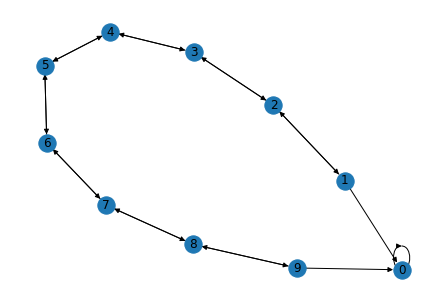

In [23]:
G = nx.cycle_graph(10)
G = nx.Graph.to_directed(G)
G.remove_edges_from([(0,1),(0,9)])
G.add_edge(0,0)

nx.draw(G, with_labels=True)

# Construct P
W = nx.adjacency_matrix(G) # -> return type is scipy.sparse.csr_matrix
W = W.toarray() # convert A to a numpy array
degrees = np.sum(W,axis=1)
D = np.diag(degrees)
P = np.linalg.inv(D) @ W

# start with random initial states and run the dynamics
alfa_err = np.zeros(200)

for i in range(200):
# rand returns random values in [0,1], thus \mu = 1/2
    x = np.random.rand(10)
    var = np.var(x)
    for n in range(500):
        x = P @ x
    alfa_err[i] = (1/2 - np.mean(x))*(1/2 - np.mean(x))

print("Expected variance of the node states:", 1/12)
print("Empirical variance of the consensus state:", np.mean(alfa_err), "\n")

In this graph the consensus value is exactly the initial state of node $0$, because the condensantion graph has 1 sink only, which is node $0$.

$$
\pi = \delta^{(0)}.
$$

This graph is the opposite of the complete graph, in the sense that all the invariant distribution centrality is on node $0$. Thus the variance of the consensus state equals the variance of the single state.

Note that this argument holds independently of the size of the graph.

# Application: linear flow dynamics

In the second part of the lab we study how to simulate the linear averaging dynamics on graphs, which is the dual of linear averaging dynamics.

Let $G=(V,E,W)$ be a weighted graph, and $x(t) \in \mathrm{R}^{V}$ denote the total mass in the node of the graph.

The dynamics of $x(t)$ reads

$$
x(t+1) = P'x(t),
$$

where $P$ is the normalized adjacency matrix of the graph and is called in this context the **routing matrix**.
The routing matrix has the following interpretation: if $x_j$ is the total mass in node $j$, $P_{ji}$ is the fraction of the mass that will be routed in node $i$ at the next step, i.e.,

$$
x_i(t+1) = \sum_{j} P_{ji} x_j(t)
$$

**Dual theorem**: assume that
- its condensation graph has 1 sink;
- the sink component of the graph is aperiodic;

Then,

$$
\lim_{t \to +\infty} x(t) = \beta \pi, \quad \beta = \mathbf{1}' x(0)
$$

i.e., the mass distribution will eventually converge to the invariant distribution centrality of the network, where the proportionality factor can be computed by using the fact that the total mass on the network is preserved, i.e.,

$$
\mathbf{1}' x(t) = \mathbf{1}' P' x(t-1) = \mathbf{1}' x(t-1).
$$

**Observation**: note that this problem is the dual of the averaging dynamics, in the sense that in the averaging $\pi' x(t)$ is constant and the dynamics converges to a state proportional to $\mathbf{1}$, whereas in the flow dynamics $\mathbf{1}' x(t)$ is constant and the dynamics converges to a state proportional to $\pi$.

**Observation**: note that the Theorem implies that under some conditions on the graph the invariant distribution centrality may be compute iteratively, by running the linear flow dynamics and normalizing the asymptotic state of the dynamics. 

### Linear flow dynamics with multiple sinks (of the condensation graph)

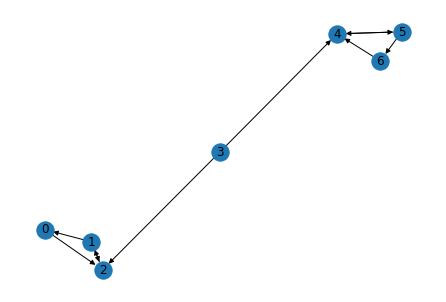

In [24]:
G = nx.DiGraph()
G.add_edges_from([(1,2),(2,1),(1,0),(0,2),(3,2),(3,4),(4,5),(5,4),(6,4),(5,6)])

# labels of nodes are couples: (column,row)
pos = nx.spring_layout(G) 
nx.draw(G, pos, with_labels=True)

In [25]:
x = np.array([1,2,3,2,3,1,6])

# Construct P
W = nx.adjacency_matrix(G) # -> return type is scipy.sparse.csr_matrix
W = W.toarray() # convert A to a numpy array
degrees = np.sum(W,axis=1)
D = np.diag(degrees)
P = np.linalg.inv(D) @ W

x = P.T @ x
print("x(1):", x)

x = P.T @ x
print("x(2):", x)

x = P.T @ x
print("x(3):", x)

x = P.T @ x
print("x(4):", x)

x = P.T @ x
print("x(5):", x)

x = P.T @ P.T @ P.T @ P.T @ P.T @ x
print("x(10):", x)

x = P.T @ P.T @ P.T @ P.T @ P.T @ x
print("x(15):", x)

x = P.T @ P.T @ P.T @ P.T @ P.T @ x
print("x(20):", x)

x = P.T @ P.T @ P.T @ P.T @ P.T @ x
print("x(25):", x)

x = P.T @ P.T @ P.T @ P.T @ P.T @ x
print("x(30):", x)

x(1): [2.  4.5 0.5 0.  7.5 3.  0.5]
x(2): [4.5 1.5 1.  0.  2.  7.5 1.5]
x(3): [1.5  3.25 2.25 0.   5.25 2.   3.75]
x(4): [3.25 3.   0.75 0.   4.75 5.25 1.  ]
x(5): [3.    2.375 1.625 0.    3.625 4.75  2.625]
x(10): [2.90625 2.71875 1.375   0.      4.25    4.59375 2.15625]
x(15): [2.8203125  2.79296875 1.38671875 0.         4.38671875 4.4375
 2.17578125]
x(20): [2.80175781 2.80078125 1.39746094 0.         4.40136719 4.40332031
 2.1953125 ]
x(25): [2.79980469 2.80041504 1.39978027 0.         4.40075684 4.3996582
 2.19958496]
x(30): [2.79989624 2.80007935 1.40002441 0.         4.40014648 4.39981079
 2.20004272]


**Question 1** Note that in node 3 the mass converges to 0. Why?

**Question 2** Can you use the asymptotic state of the dynamics to deduce all the invariant distribution probabilities of the graph?

### Linear flow dynamics on graph whose condensation graph has a unique sink (but not strongly connected)

Let us now add a link in such a way that the condensation graph has now a single sink.

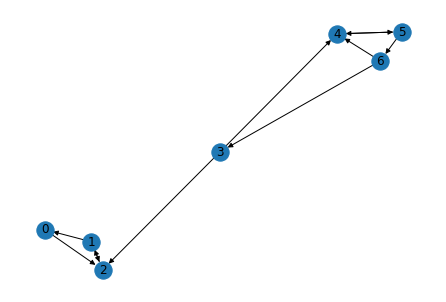

In [26]:
G.add_edge(6,3)
nx.draw(G, pos, with_labels=True)

**Question 3** What kind of asymptotic state do you expect for this graph?

In [27]:
# Construct P
W = nx.adjacency_matrix(G) # -> return type is scipy.sparse.csr_matrix
W = W.toarray() # convert A to a numpy array
degrees = np.sum(W,axis=1)
D = np.diag(degrees)
P = np.linalg.inv(D) @ W

# define initial condition
x = [1, 1, 0, 1, 1, 0, 0]

for n in range(999):
    x = P.T @ x
print("x(1000):", x, "\n")

x(1000): [1.60000000e+00 1.60000000e+00 8.00000000e-01 6.68200851e-24
 2.28913919e-23 2.41048151e-23 1.26912797e-23] 



### Recap

If the graph is not strongly connected, but still its condensation graph has one sink:
- the averaging dynamics converges to a consensus, whose value depends only on the initial state of nodes of the sink;
- the linear flow dynamics converges to the dominant eigenvector of $P'$, which has support only on the nodes of the sink.

### Duality of the problems
We are given an aperiodic graph whose condensiation graph has 1 sink, and the initial state $x(0)$.

We can compute the asymptotic consensus value without running it.

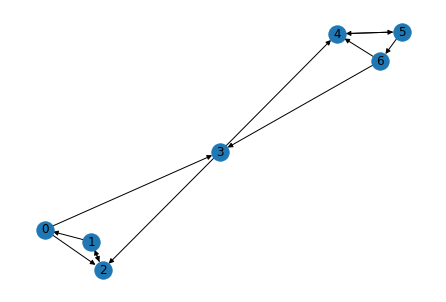

In [28]:
G = nx.DiGraph()
G.add_nodes_from([0,1,2,3,4,5,6])
G.add_edges_from([(1,2),(2,1),(1,0),(0,2),(3,2),(3,4),(4,5),(5,4),(6,4),(5,6),(6,3),(0,3)])
# labels of nodes are couples: (column,row)
nx.draw(G, pos, with_labels=True)

# Construct P
W = nx.adjacency_matrix(G) # -> return type is scipy.sparse.csr_matrix
W = W.toarray() # convert A to a numpy array
degrees = np.sum(W,axis=1)
D = np.diag(degrees)
P = np.linalg.inv(D) @ W

In [29]:
x = np.random.rand(7)

# compute \pi by running the mass dynamics with a normalized initial condition y
# the asymptotic state will be exactly \pi.

y = np.random.rand(7)
y = y/np.sum(y)

for iter in range(500):
    y = P.T @ y

# the consensus value is pi.T @ x, but y(t) --> \pi, thus we can use y instead of \pi.
print("The consensus value:", y.T @ x)

The consensus value: 0.36305915201031597


In [30]:
# check the result by running the averaging dynamics
for iter in range(500):
    x = P @ x
    
print("The asymptotic state x:", x)

The asymptotic state x: [0.36305915 0.36305915 0.36305915 0.36305915 0.36305915 0.36305915
 0.36305915]


### Application: distributed computation of average

Let the node set describe a set of sensors that are deployed in some region in order to collect measurements of some quantity of interest (for example, the temperature). 

Assume that these sensors have limited communication and computation capabilities that allow each of them to exchange information only with those other sensors that are close enough in space. 

Let the graph $G = (V, E)$ describe the pattern of vicinity among the sensors $i$ and $j$ so that there is an undirected link between node $i$ and node $j$ if they can communicate to each other (possibly using link weights decreasing with distance). Then, one can design a distributed algorithm for computing the average of the sensor's measurements based on the averaging dynamics.

Let $x_i(0)$ be the measurement of each node. 

We are interested in designing an iterative distributed algorithm that allows the nodes to compute

$$
x = \frac{1}{n}\sum_i x_i(0)
$$

**First attempt**
We run a consensus algorithm. Since the graph is undirected, $\pi_i = \frac{w_i}{\sum_j w_j}$. Thus, the algorithm converges to a consensus $\alpha \mathbf{1}$ such that

$$
\alpha = \sum_{i} \frac{w_i}{w} x_i(0).
$$

If each edge knows its degree $w_i$, each node can rescale its initial state, i.e., $y_i(0) = \frac{x_i(0)}{w_i}$. The consensus algorithm for the variable $y_i$ thus converges to

$$
\alpha_y = \sum_{i} \frac{w_i}{w} y_i(0) = \frac{1}{w} \sum_{i} x_i(0).
$$

If we assume that each node knows the average degree of the network, thus

$$
x = \alpha_y \frac{w}{n} = \alpha_y \overline{w}.
$$


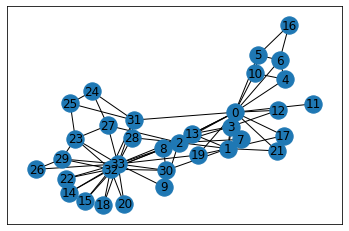

In [31]:
G = nx.karate_club_graph()

# Fix node positions on all pictures according to spring layout
pos = nx.spring_layout(G) 
nx.draw_networkx(G, pos)

n_nodes = len(G)

x = np.random.rand(n_nodes)

In [32]:
# Let us run the consensus algorithm for y

# Construct P
W = nx.adjacency_matrix(G) # -> return type is scipy.sparse.csr_matrix
W = W.toarray() # convert A to a numpy array
degrees = np.sum(W,axis=1)
D = np.diag(degrees)
P = np.linalg.inv(D) @ W

y = x/degrees

for t in range(1000):
    y = P @ y

print("average state:", np.mean(x))
# choose arbitrarly the first node, but all the nodes reach consensus on y
print("average computed distributively", y[0] * np.sum(degrees) / n_nodes)

average state: 0.4733744427506693
average computed distributively 0.47337444275066837


The algorithm works! Unfortunately, requiring that each node knows the average degree of the network is not realistic.

However, there exists another way to solve the problem.

We run a second averaging dynamics, with initial condition $z_i(0) = \frac{1}{w_i}$.

This converges to

$$
\lim_{t \to + \infty} z_i(t) = \sum_i z_i(0) \frac{w_i}{w} = \sum_{i} \frac{1}{w} = \frac{1}{\overline{w}}
$$

By combining the two, each node can estimate the average estimate by 

$$
\frac{\lim_{t \to + \infty} y_i(t)}{\lim_{t \to + \infty} z_i(t)} =
$$

In [33]:
# Let us implement this

z = 1/degrees

for t in range(1000):
    z = P @ z

print("average state:", np.mean(x))
# choose arbitrarly the first node, but all the nodes reach consensus both on y and z
print("average computed distributively", y[0] / z[0])

average state: 0.4733744427506693
average computed distributively 0.4733744427506694
